### Load in data, and get bearings

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('EEG-1.mat')

In [ ]:
whos

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [5]:
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

In [6]:
np.shape(EEGa)

(1000, 500)

In [7]:
np.shape(t)

(500,)

In [8]:
whos

Variable   Type        Data/Info
--------------------------------
EEGa       ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
EEGb       ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
data       dict        n=6
loadmat    function    <function loadmat at 0x0AB0BDF8>
np         module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
t          ndarray     500: 500 elems, type `float64`, 4000 bytes


In [11]:
ntrials = EEGa.shape[0]
print(ntrials)

1000


In [12]:
nsamples = EEGa.shape[1]

### Visual inspection of trials 

In [13]:
print( EEGa[0,:] )

[-1.85909632e-01  4.49876010e-01  1.06070801e+00 -4.71265246e-01
  1.68669327e+00  9.38221338e-01  2.21207038e-01  4.05491276e-01
  8.78879665e-01  5.23697825e-01 -2.35240678e+00 -9.24345879e-01
  7.66671797e-01 -4.64254999e-01  6.25953180e-02  1.51917029e+00
 -7.76400815e-01  8.14988739e-01 -1.58137285e-01 -6.17402518e-01
  2.07506393e-01  3.59430871e-01 -1.21455008e+00 -6.16715452e-01
 -4.81362032e-02  3.17982689e-01 -2.77459585e-01  4.14839815e-02
 -1.52257779e+00  1.31993666e+00  1.46836023e+00  1.84666100e+00
  5.23163980e-02  2.05515379e-01  2.27994679e-01 -1.34063464e+00
  5.61451651e-01  1.20391968e+00  1.06398658e+00  4.38748238e-01
  1.64443736e+00 -1.54713823e+00  6.41177787e-01 -1.13319311e+00
  1.06869889e+00  3.88678297e-01 -1.86251056e+00 -1.14074604e+00
 -4.59323117e-01  7.46220184e-01  4.40752835e-01 -7.05129357e-01
 -1.85879610e-01 -4.52021194e-02 -7.74389189e-01  1.55051475e+00
  1.12600755e+00 -1.14703552e+00 -5.42577409e-02  8.27809465e-01
  8.56502531e-01 -1.14366

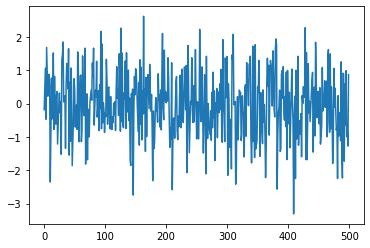

In [15]:
%matplotlib inline
plt.figure()
plt.plot(EEGa[0])                   # Plot the data from condition A, trial 1.

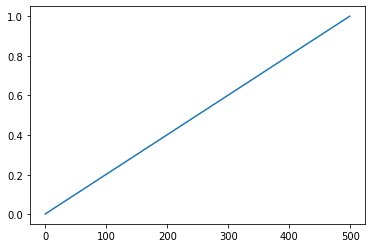

In [16]:
plt.figure()
plt.plot(t);          # Plot the time axis

In [17]:
dt = t[1] - t[0]  # Determine the sampling interval
print(dt)

0.002


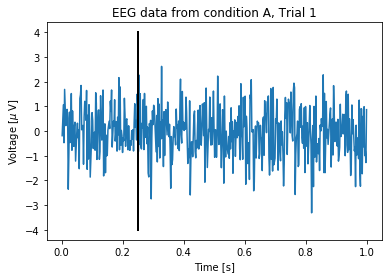

In [19]:
plt.clf()
plt.plot(t, EEGa[0])                     # Plot condition A, trial 1 data vs t.
plt.xlabel('Time [s]')                   # Label the x-axis as time.
plt.ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plt.plot([0.25, 0.25], [-4,4], 'k', lw=2)
plt.show()

Text(0.5, 1.0, 'EEG data from conditions A (blue) and B (red), Trial 10')

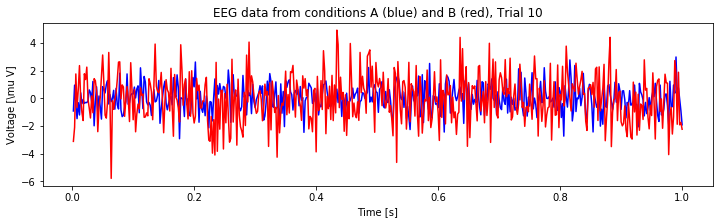

In [20]:
plt.figure(figsize=(12, 3))     # Resize the figure to make it easier to see
plt.plot(t,EEGa[10], 'b')            # Plot condition A, trial 1, data vs t,
plt.plot(t,EEGb[10], 'r')            # ... and the data from condition B, trial 1,
plt.xlabel('Time [s]')              # Label the x-axis as time.
plt.ylabel('Voltage [\mu V]')       # Label the y-axis as voltage.
plt.title('EEG data from conditions A (blue) and B (red), Trial 10') # And give it a title.
#plt.show()

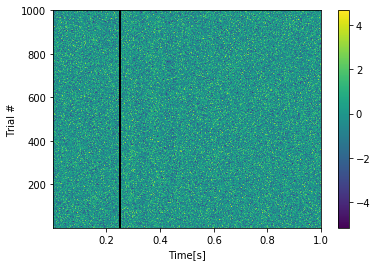

In [22]:
plt.figure()
plt.imshow(EEGa,                                   # Image the data from condition A.
           #cmap='BuPu',                            # ... set the colormap (optional)
           extent=[t[0], t[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Trial #')
plt.colorbar()                                     # Show voltage to color mapping
plt.vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line
plt.show()

### Plotting the ERP <a id="plotting-the-erp"></a>

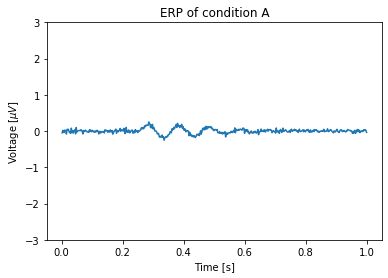

In [25]:
plt.figure()
plt.plot(t, np.mean(EEGa,0))  # Plot the ERP of condition A
plt.xlabel('Time [s]')           # Label the axes
plt.ylabel('Voltage [$\mu V$]')
plt.title('ERP of condition A')  # ... provide a title
plt.ylim([-3, 3])
plt.show()                       # ... and show the plot

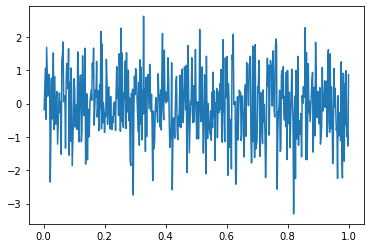

In [26]:
plt.figure()
plt.plot(t, EEGa[0])

### Confidence Intervals for the ERP (Method 1) <a id="cis-m1"></a>

In [27]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)

In [28]:
sd = EEGa.std(0)  # Compute the std across trials

In [29]:
sdmn = sd / np.sqrt(ntrials)  # Compute the std of the mean

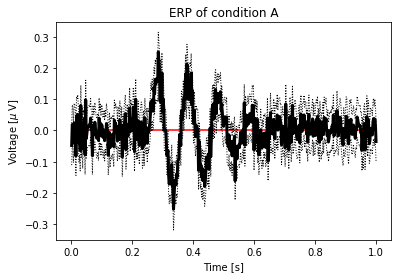

In [34]:
plt.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
plt.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
plt.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
plt.xlabel('Time [s]')                     # Label the axes
plt.ylabel('Voltage [$\mu$ V]')
plt.title('ERP of condition A')    # ... provide a useful title
plt.hlines(0, t[0], t[-1], 'r');
plt.show()

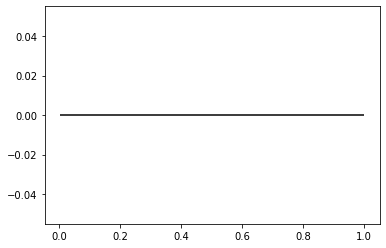

In [32]:
plt.hlines(0, t[0], t[-1]);